### Statistical Learning Course- Spring 2023

#### libraries :

In [40]:
import math
import statistics
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from tabulate                      import tabulate
from sklearn.linear_model          import LogisticRegression
from sklearn.metrics               import f1_score
from sklearn                       import datasets
from sklearn                       import metrics
from sklearn                       import preprocessing
from sklearn.datasets              import load_digits
from sklearn.model_selection       import train_test_split
from sklearn.preprocessing         import StandardScaler
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.decomposition         import PCA
from sklearn.metrics               import classification_report
from sklearn.metrics               import confusion_matrix
from sklearn.metrics               import accuracy_score
from sklearn.metrics               import mean_squared_error            as MSE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis    as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from numpy                         import log,dot,exp,shape
from sklearn.metrics               import roc_auc_score
from sklearn.metrics               import roc_curve

%matplotlib inline

In [41]:
random_state = 0

*In this exercise, the goal is to use a Logistic Regression model to solve a binary classification problem.*

In [42]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


<Axes: >

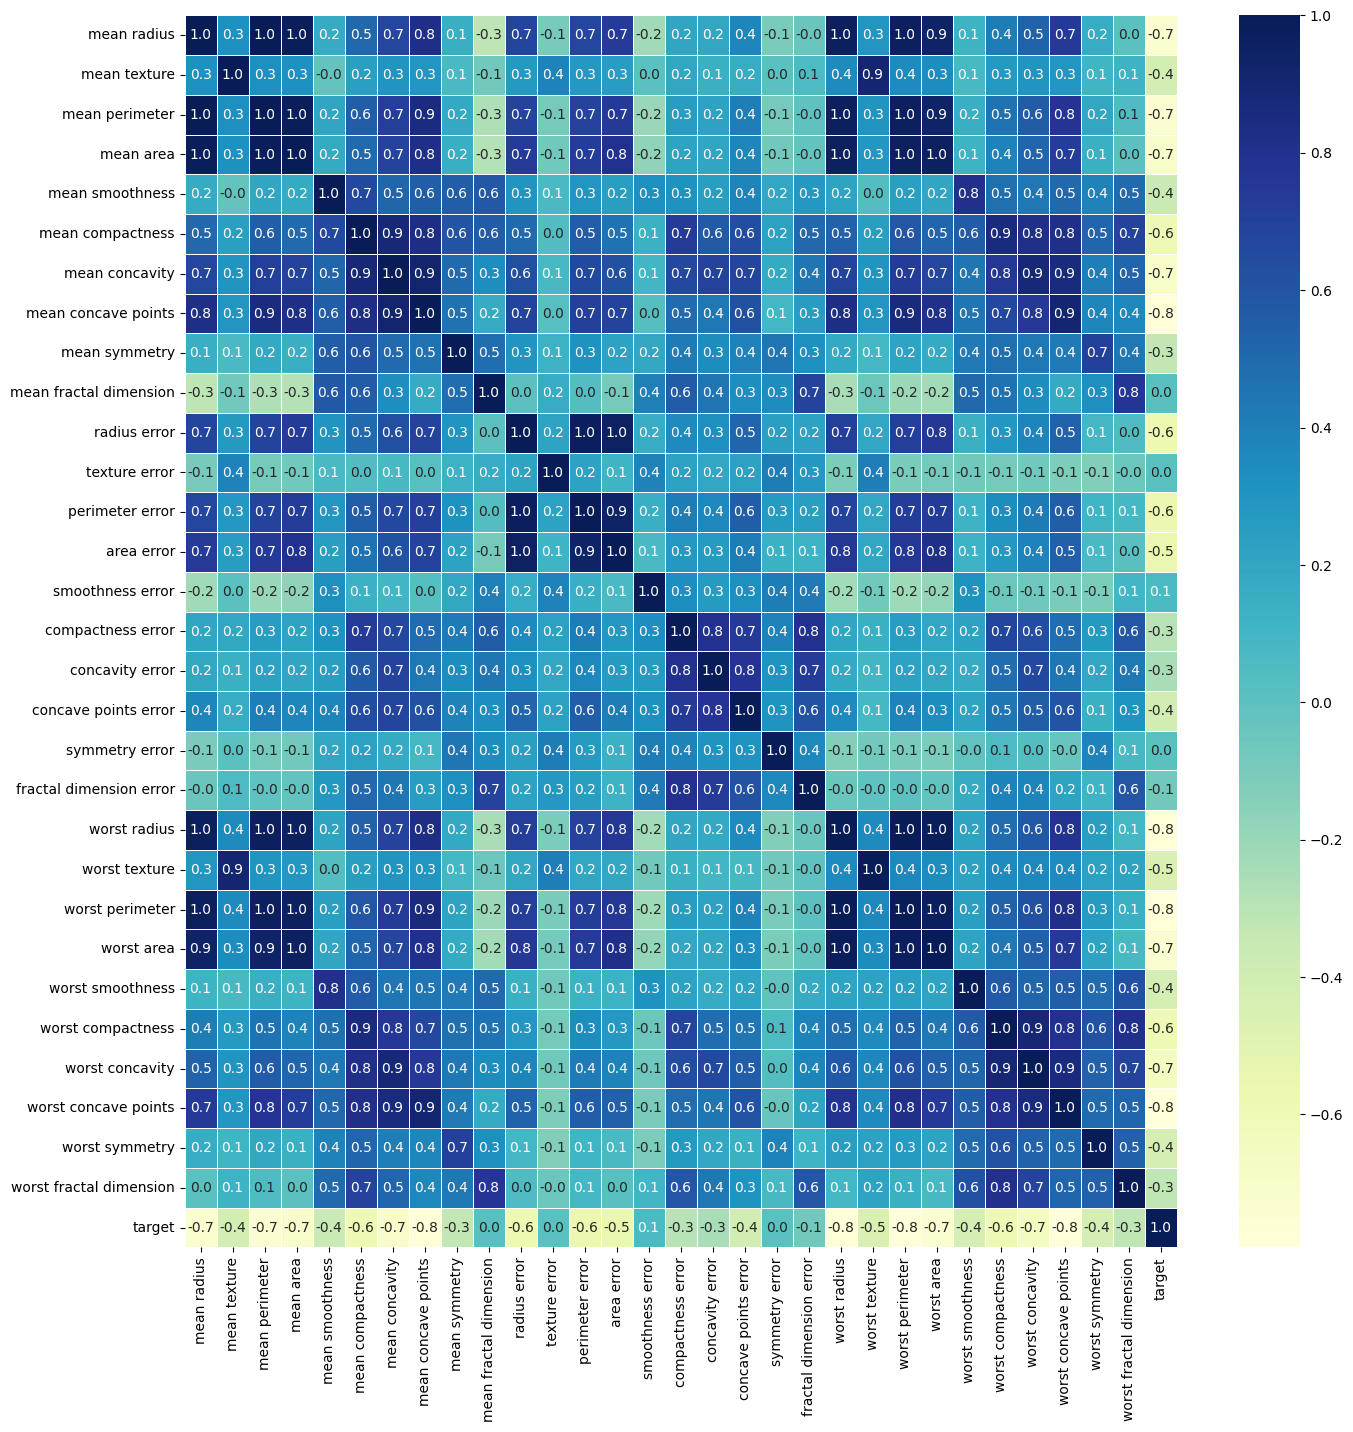

In [43]:
plt.rcParams['figure.figsize']=16,16                                          #size of figure
sns.heatmap(df.corr(),annot=True, fmt = ".1f" , cmap="YlGnBu",  linewidth=.5) #YlGnBu is a color palette
# data visualization to check the impact of each data column

<Axes: >

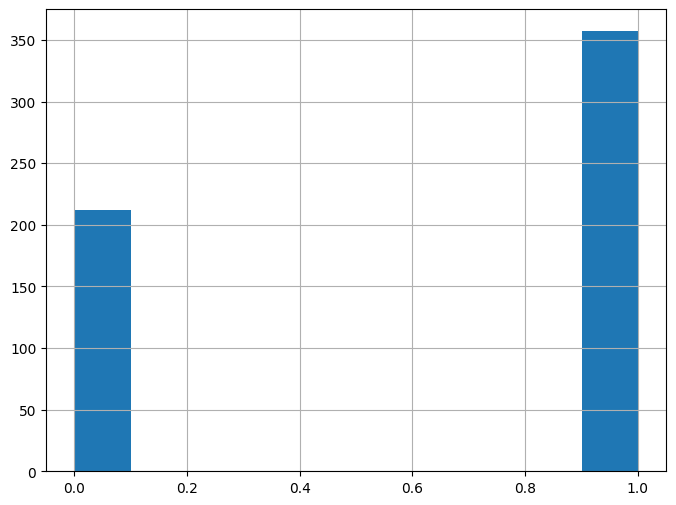

In [44]:
plt.rcParams['figure.figsize']=8,6 #size of figure
df['target'].hist()

In [45]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [46]:
df.shape

(569, 31)

In [47]:
df['target'].value_counts()

,count
target,
1.0,357
0.0,212


*If discrepancies in the dataset labels were identified, we were instructed to make the necessary corrections. The code implemented in the previous cells confirms that all targets are appropriately labeled. Out of a total of 569 targets, 357 are labeled as 1, while 212 are labeled as 0. Therefore, there are no unlabelled targets present in the dataset.*

In [48]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [49]:
# Split data into 80% train and 20% test subsets
bc   = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,  random_state=0)

print('X_train shape :  '   , X_train.shape)
print('y_train shape :  '   , y_train.shape)
print('\nX_test shape  :  ' , X_test.shape )
print('y_test shape  :  '   , y_test.shape )

X_train shape :   (455, 30)
y_train shape :   (455,)

X_test shape  :   (114, 30)
y_test shape  :   (114,)


In [50]:
#Standardization

X_scaler = StandardScaler().fit(X_train)
X_train  = X_scaler.transform(X_train)
X_test   = X_scaler.transform(X_test)


# (A)

*Implementation of a classifier using Logistic Regression with NumPy.*

In [51]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class my_model():

    def __init__(self, lr=0.001, n_iters=100):      #lr: learning rate         n_iter: number of iterations
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = (np.dot(X, self.weights) + self.bias)
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights.reshape(-1,1)
            self.lr*dw.reshape(-1,1)
            self.weights = (self.weights - self.lr*dw)
            self.bias = (self.bias - self.lr*db)


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

# (B)

In this section, I will analyze the classification model developed in Part (A) to further assess its performance. The focus will be on utilizing the Receiver Operating Characteristic (ROC) curve to evaluate the model against the test dataset. Additionally, I will investigate the impact of different classification thresholds on the model’s performance metrics, specifically sensitivity and specificity. This analysis will help in identifying the optimal threshold for maximizing classification accuracy.

In [52]:
clf = my_model(0.01,1000)
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
error = 1 - acc
print('accuracy    = ' ,acc)
print('total error = ' , error)

accuracy    =  0.9824561403508771
total error =  0.01754385964912286


In [53]:
def perf_measure(y_test, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)):
        if y_test[i]==y_pred[i]==1:
            TP += 1                                   #positive samples that are truely  detected as positive
        if y_pred[i]==1 and y_test[i]!=y_pred[i]:
            FP += 1                                   #negative samples that are falsely detected as positive
        if y_test[i]==y_pred[i]==0:
            TN += 1                                   #negative samples that are truely  detected as negative
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
            FN += 1                                   #positive samples that are falsely detected as negative

    return 'TP:' , TP, 'FP:', FP, 'TN:', TN, 'FN:', FN

print(perf_measure(y_test, y_pred))


('TP:', 87, 'FP:', 1, 'TN:', 25, 'FN:', 1)


An ROC curve is a plot of sensitivity on the y axis against (1−specificity) on the x axis for varying values of the threshold t.

Text(0.5, 1.0, 'ROC')

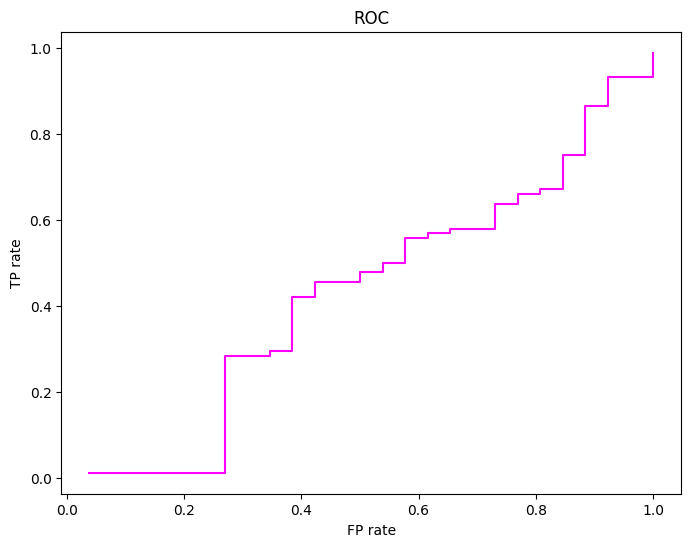

In [54]:
plt.rcParams['figure.figsize']=8,6 #size of figure

threshold             = 0
sensitivity           = []           #TP rate
one_minus_specificity = []           #FP rate = 1 - specificity

for threshold in range (0,len(y_test),1):
    sen_count=0
    spe_count=0
    for i in range (threshold):
        if( y_test[i]==y_pred[i]==0 ):   # negative samples that are truely detected as negative = TN
            spe_count +=1

    one_minus_specificity.append(1-(spe_count/(26)) )  #TN+FP=26

    for i in range (len(y_test)-threshold):
        if( y_test[threshold+i]==y_pred[threshold+i]==1):
            sen_count += 1

    sensitivity.append(sen_count/(88)) #TP+FN=88

plt.plot(one_minus_specificity, sensitivity , color ='magenta')
plt.ylabel('TP rate')
plt.xlabel('FP rate')
plt.title ('ROC')

The discontinuity in the graph is attributed to the presence of threshold steps.

In [55]:
sensitivity # sensitivity in different thresholds(0-len(y_test))

[0.9886363636363636,
 0.9772727272727273,
 0.9659090909090909,
 0.9545454545454546,
 0.9431818181818182,
 0.9318181818181818,
 0.9318181818181818,
 0.9318181818181818,
 0.9204545454545454,
 0.9090909090909091,
 0.8977272727272727,
 0.8863636363636364,
 0.875,
 0.8636363636363636,
 0.8636363636363636,
 0.8522727272727273,
 0.8409090909090909,
 0.8295454545454546,
 0.8181818181818182,
 0.8068181818181818,
 0.7954545454545454,
 0.7840909090909091,
 0.7727272727272727,
 0.7613636363636364,
 0.75,
 0.75,
 0.7386363636363636,
 0.7272727272727273,
 0.7159090909090909,
 0.7045454545454546,
 0.6931818181818182,
 0.6818181818181818,
 0.6704545454545454,
 0.6704545454545454,
 0.6590909090909091,
 0.6590909090909091,
 0.6477272727272727,
 0.6363636363636364,
 0.6363636363636364,
 0.625,
 0.6136363636363636,
 0.6022727272727273,
 0.5909090909090909,
 0.5795454545454546,
 0.5795454545454546,
 0.5795454545454546,
 0.5681818181818182,
 0.5681818181818182,
 0.5568181818181818,
 0.5568181818181818,
 0.5

In [56]:
one_minus_specificity # 1-specificity in different thresholds(0-len(y_test))

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9615384615384616,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8461538461538461,
 0.8076923076923077,
 0.8076923076923077,
 0.7692307692307692,
 0.7692307692307692,
 0.7692307692307692,
 0.7307692307692308,
 0.7307692307692308,
 0.7307692307692308,
 0.7307692307692308,
 0.7307692307692308,
 0.7307692307692308,
 0.6923076923076923,
 0.6538461538461539,
 0.6538461538461539,
 0.6153846153846154,
 0.6153846153846154,
 0.5769230769230769,
 0.5769230769230769,
 0.5769230769230769

# (C)

I will select two points from the ROC curve and report the corresponding metrics for those points, including the F1 Score, True Positive Rate (TPR), False Positive Rate (FPR), misclassification rate, and precision. This will allow me to compare these metrics and analyze the differences between the two points, providing insights into the performance of the classification model at different thresholds.

Text(0.5, 0, 'FP rate')

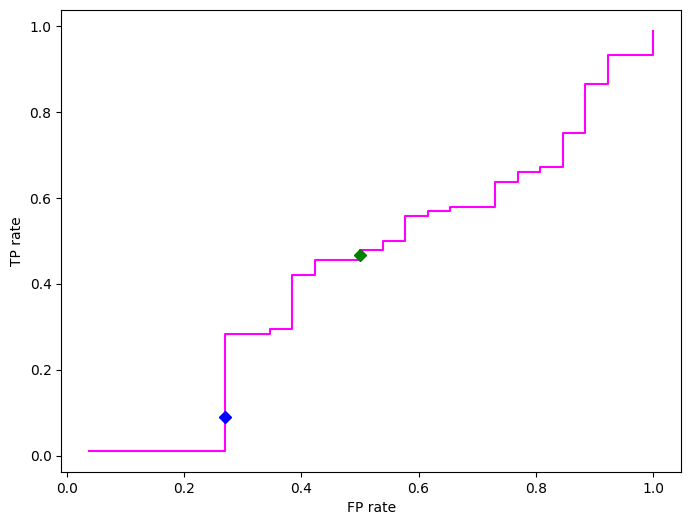

In [57]:
plt.plot(one_minus_specificity, sensitivity , color ='magenta')
plt.plot(one_minus_specificity[60] , sensitivity[60]  , marker = "D", color='green')
plt.plot(one_minus_specificity[100], sensitivity[100] , marker = "D", color='blue' )
plt.ylabel('TP rate')
plt.xlabel('FP rate')

In [58]:
print('blue  : ' , 'FP rate:', one_minus_specificity[100], ', TP rate:', sensitivity[100])
print('green : ' , 'FP rate:', one_minus_specificity[60] ,  ' , TP rate:', sensitivity[60])

blue  :  FP rate: 0.2692307692307693 , TP rate: 0.09090909090909091
green :  FP rate: 0.5  , TP rate: 0.4659090909090909


In [59]:
#Calculated in the cells above: ('TP:', 87, 'FP:', 1, 'TN:', 25, 'FN:', 1)

TP = 87
FP = 1
TN = 25
FN = 1

# TP rate = sensitivity
# TN rate = specificity
# FP rate = 1 - specificity
# FN rate = 1 - sensitivity

#miss classification rate = (FP + FN)/total

#precision = TP / TP + FP

#F1 score =  2* (precision*sensitivity)/(precision+sensitivity)

mylist=[]
def calculation (FPr , TPr):
    TPr = TPr
    FPr = FPr
    miss_classification_rate = (FPr*26 + (1-(TPr*88)) / (TP+FP+TN+FN))
    precision = TPr*88 / TPr*88 + FPr*26
    f1= (2*precision*TPr)/(precision+TPr)

    print('f1:',f1)
    print ('TPr:',TPr)
    print('FPr:',FPr)
    print('miss_classification_rate:',miss_classification_rate)
    print('presicion:',precision)

print('BLUE:')
calculation (one_minus_specificity[100] , sensitivity[100])
print('\n')
print('GREEN:')
calculation ( one_minus_specificity[60] , sensitivity[60])

BLUE:
f1: 0.18181604935375664
TPr: 0.09090909090909091
FPr: 0.2692307692307693
miss_classification_rate: 6.938596491228071
presicion: 7751.0


GREEN:
f1: 0.9317622173360853
TPr: 0.4659090909090909
FPr: 0.5
miss_classification_rate: 12.649122807017545
presicion: 7757.0


# (D)

In this section, I am training the logistic regression model using the specified learning rate of 0.01. I fit the model to the training data (X_train and y_train) and then use it to make predictions on the test data (X_test). After training, I print the model's weights and bias, which are key parameters that determine the decision boundary of the classifier.

In [60]:
clf = my_model(lr=0.01)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('weights:' , clf.weights)
print('\nbias:' , clf.bias)


weights: [-0.15624441 -0.12065744 -0.1571594  -0.14906462 -0.07668718 -0.10440806
 -0.12526436 -0.15588795 -0.05041329  0.02787888 -0.1123386   0.00625685
 -0.10647486 -0.11235411  0.01618565 -0.02139687 -0.00997995 -0.05787853
  0.02209164  0.02470689 -0.16993033 -0.12972022 -0.168917   -0.15718139
 -0.11099673 -0.11523799 -0.12798547 -0.16823724 -0.0906741  -0.06123975]

bias: 0.06478931641830361


# (E)

In this section, I am implementing logistic regression using the scikit-learn library. I will train the model on the dataset and evaluate its performance using various metrics. Specifically, I will generate the ROC curve and calculate the AUC (Area Under the Curve) to assess the model's ability to distinguish between classes. By analyzing these metrics, I aim to understand the effectiveness of the logistic regression model and its predictive capabilities.

In [61]:
skmodel = LogisticRegression()

In [62]:
skmodel

LogisticRegression()

In [63]:
skmodel.fit(X_train,y_train)

#MODEL ACCURACY
skmodel.score(X_test,y_test)

yhat=skmodel.predict(X_test)   #Predicts labels for test data
yhat

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1])

In [64]:
yhat_prob=skmodel.predict_proba(X_test)   #Predicts probability,useful also in log loss calculations
yhat_prob

array([[6.98915680e-01, 3.01084320e-01],
       [3.34261149e-01, 6.65738851e-01],
       [8.45122100e-02, 9.15487790e-01],
       [3.33882032e-02, 9.66611797e-01],
       [2.02477261e-03, 9.97975227e-01],
       [9.99999763e-01, 2.36862132e-07],
       [1.00000000e+00, 4.39363616e-23],
       [5.34274214e-02, 9.46572579e-01],
       [4.24093656e-03, 9.95759063e-01],
       [1.40643490e-02, 9.85935651e-01],
       [1.81053268e-01, 8.18946732e-01],
       [2.50278493e-01, 7.49721507e-01],
       [5.20777746e-04, 9.99479222e-01],
       [9.99957426e-01, 4.25735500e-05],
       [2.98994663e-01, 7.01005337e-01],
       [1.04311438e-03, 9.98956886e-01],
       [1.12441237e-01, 8.87558763e-01],
       [2.79253110e-02, 9.72074689e-01],
       [6.58101196e-03, 9.93418988e-01],
       [2.31362763e-04, 9.99768637e-01],
       [5.38843293e-03, 9.94611567e-01],
       [2.64321968e-01, 7.35678032e-01],
       [8.13665725e-04, 9.99186334e-01],
       [8.49288353e-04, 9.99150712e-01],
       [9.462884

<Axes: >

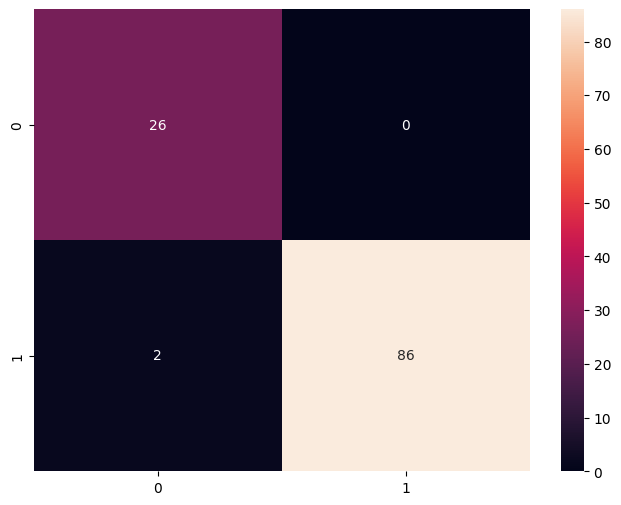

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
CM=metrics.confusion_matrix(y_test,yhat,labels=[0,1])
plt.figure(figsize=(8,6))
sns.heatmap(CM,annot=True)

In [66]:
f1_score(y_test, yhat, average=None)

array([0.96296296, 0.98850575])

In [67]:
print(classification_report(y_test,yhat))
#Shows PRECISION, RECALL, F1 SCORE

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.98      0.99        88

    accuracy                           0.98       114
   macro avg       0.96      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [68]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)  #Log Loss for Logistic Regression Classifier

0.08784561779829665

In [69]:
print('coefficients are :\n\n' , skmodel.coef_) #وزن ها

print('intercept:\n\n', skmodel.intercept_)      #bias

coefficients are :

 [[-0.28482511 -0.76642025 -0.29358101 -0.38254655 -0.18905224  0.40981924
  -0.53474409 -0.62506572  0.21959921  0.19936882 -1.11770166  0.31273512
  -0.71682399 -0.92644447 -0.11882841  0.679781    0.19298794 -0.42230903
   0.09601251  0.54517802 -0.96852168 -1.10131719 -0.85351139 -0.95691019
  -0.8496902   0.02461712 -0.69394764 -0.97959119 -0.63389264 -0.52551435]]
intercept:

 [-0.29813747]


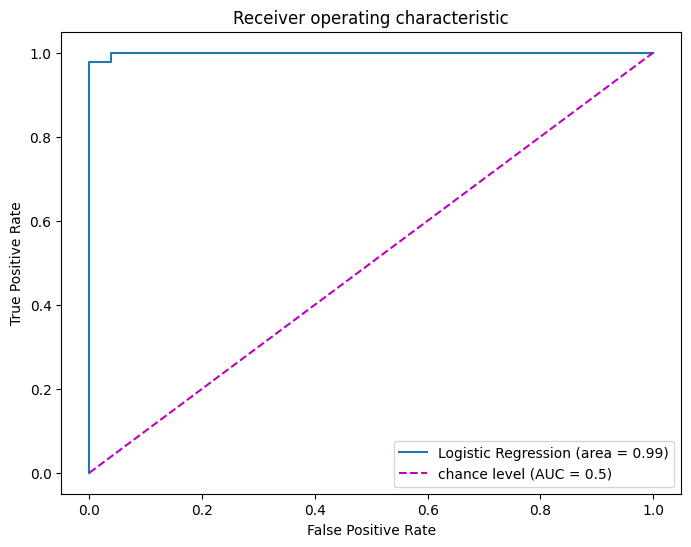

In [70]:

logit_roc_auc = roc_auc_score(y_test, skmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, skmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'m--', label="chance level (AUC = 0.5)")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



The performance of logistic regression implemented with NumPy and scikit-learn is quite similar, with the key difference being that the scikit-learn library tends to provide higher accuracy.

In the implementation using NumPy, we observed the following results:

False Positives (FP): 1
True Positives (TP): 87
False Negatives (FN): 1
True Negatives (TN): 25
In contrast, the implementation using scikit-learn yielded:

False Positives (FP): 0
True Positives (TP): 86
False Negatives (FN): 2
True Negatives (TN): 26
It is important to note that in this specific case, accurately identifying malignant tumors is critical, as misclassifying a malignant tumor as benign could jeopardize the patient's life. Conversely, if a benign tumor is incorrectly identified as malignant, the individual is not at immediate risk.

Thus, the significance of errors is not uniform; it is crucial to correctly identify instances labeled as '1' (malignant). From this perspective, the NumPy implementation resulted in fewer errors; however, the differences between the two models are not substantial, with the numbers being very close overall.